In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aerofit = pd.read_csv('C:\\Users\\Admin\\OneDrive\\Desktop\\Scaler\\Aerofit_treadmill.csv')
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# EDA & Data Preparation

In [3]:
aerofit.shape

(180, 9)

In [4]:
aerofit.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [5]:
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
aerofit.duplicated().sum()

0

In [7]:
aerofit['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [8]:
print(aerofit.Age.min())
print(aerofit.Age.max())

18
50


In [9]:
def age_group(i):
    if i <= 24:
        return 'Gen Z'
    elif i >= 25 and i <= 35:
        return 'Young Adult'
    else:
        return 'Middle Aged'

In [10]:
aerofit['Age Group'] = aerofit['Age'].apply(age_group)
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age Group
0,KP281,18,Male,14,Single,3,4,29562,112,Gen Z
1,KP281,19,Male,15,Single,2,3,31836,75,Gen Z
2,KP281,19,Female,14,Partnered,4,3,30699,66,Gen Z
3,KP281,19,Male,12,Single,3,3,32973,85,Gen Z
4,KP281,20,Male,13,Partnered,4,2,35247,47,Gen Z


In [11]:
aerofit['Age Group'].value_counts()

Age Group
Young Adult    98
Gen Z          54
Middle Aged    28
Name: count, dtype: int64

In [12]:
print(aerofit['Age'].mean())
print(aerofit['Age'].median())
print('-'*50)
print(aerofit['Income'].mean())
print(aerofit['Income'].median())
print('-'*50)
print(aerofit['Miles'].mean())
print(aerofit['Miles'].median())

28.788888888888888
26.0
--------------------------------------------------
53719.57777777778
50596.5
--------------------------------------------------
103.19444444444444
94.0


# Let's do Visualization to understand data better

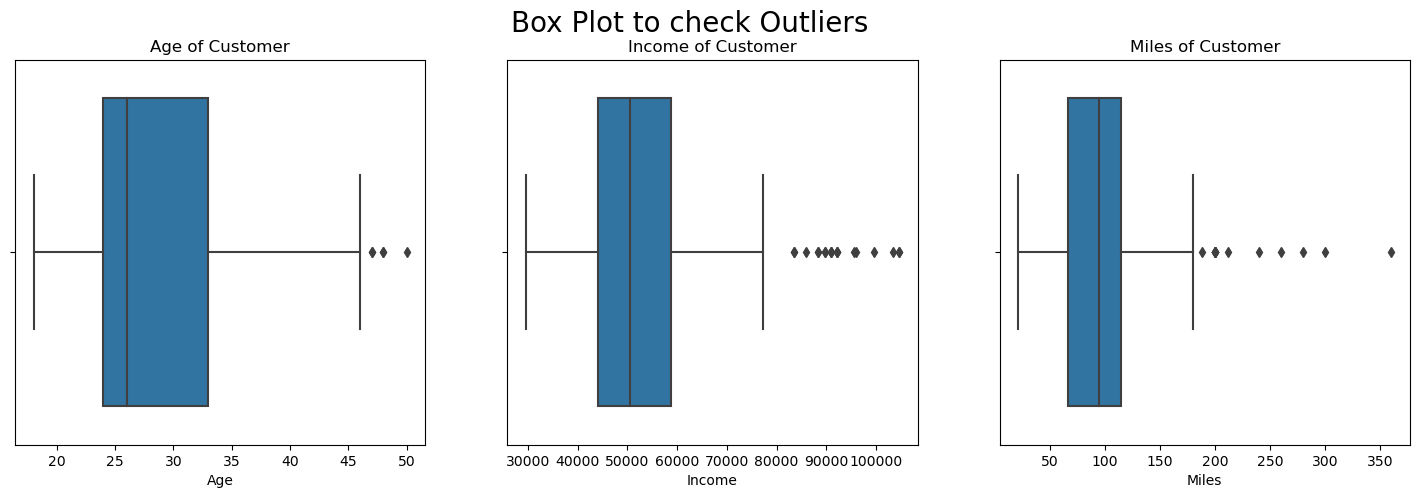

In [13]:
plt.figure(figsize=(18,5)).suptitle("Box Plot to check Outliers",fontsize=20)

plt.subplot(1, 3, 1)
sns.boxplot(data = aerofit, x = 'Age', orient= 'h')
plt.title('Age of Customer', fontsize=12)

plt.subplot(1, 3, 2)
sns.boxplot(data = aerofit, x = 'Income', orient= 'h')
plt.title('Income of Customer', fontsize=12)

plt.subplot(1, 3, 3)
sns.boxplot(data = aerofit, x = 'Miles', orient= 'h')
plt.title('Miles of Customer', fontsize=12)

plt.show()

As we can see in above visualizations, All three columns contain outliers and amongst these 3 Income has the most outliers value

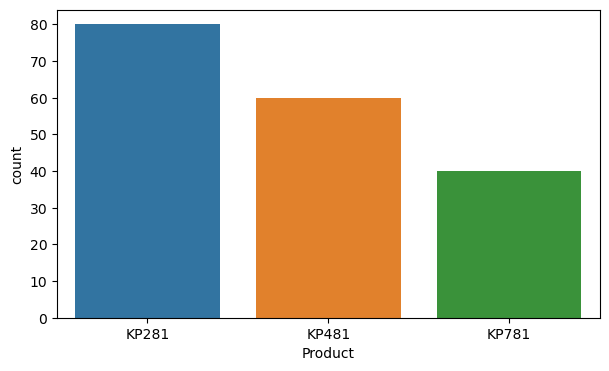

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(data = aerofit, x = 'Product')
plt.show()

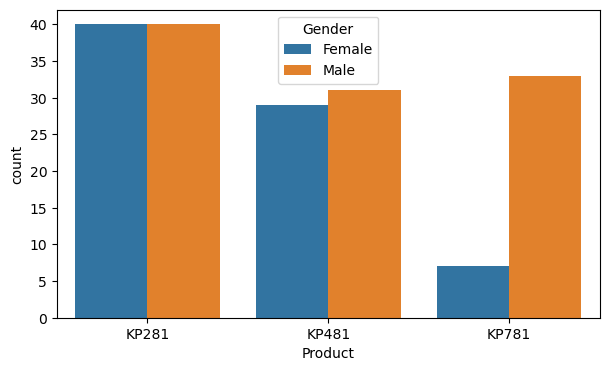

In [15]:
plt.figure(figsize=(7,4))
group_data = aerofit.groupby(['Gender','Product'])['Product'].count().reset_index(name = 'count')
sns.barplot(data = group_data, x = 'Product', y = 'count', hue = 'Gender')
plt.show()

From this above bar chart we can clearly see that the male and female contribution is almost equal in product - KP281 & KP481 but for product KP781 only male has contributed the most

# Let's do some probability here

In [16]:
pd.crosstab(index = aerofit['Product'],columns = aerofit['Gender'], margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [17]:
pd.crosstab(index = aerofit['Product'],columns = aerofit['Gender'], margins=True,normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


The above 2 crosstab data results concludes following :
1) The Probability of purchasing KP281 product given that the Gender is "Female" is 50% and the Probability of purchasing KP281 product given that the Gender is "Male" is also 50%
2) The Probability of purchasing KP781 product given that the Gender is "Female" is just 17% whereas the Probability of purchasing KP781 product given that the Gender is "Male" is also 82.5%

In [18]:
pd.crosstab(index = aerofit['Product'],columns = aerofit['MaritalStatus'], margins=True,normalize='index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


The probability of purchasing any product given that MaritalStatus is "Partnered" is high as compared to "Single" MaritalStatus.

In [19]:
pd.crosstab(index = aerofit['Product'],columns = aerofit['Age Group'], margins=True,normalize='index')

Age Group,Gen Z,Middle Aged,Young Adult
Product,,,
KP281,0.337500,0.175000,0.487500
KP481,0.283333,0.133333,0.583333
KP781,0.250000,0.150000,0.600000
All,0.300000,0.155556,0.544444


This crosstab help us to identify that probability of purchasing any product is more than 50% if it a young Adult

<Axes: xlabel='Fitness', ylabel='count'>

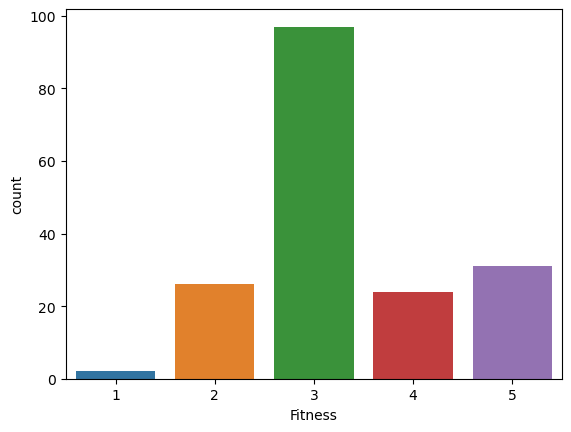

In [20]:
sns.countplot(data = aerofit, x = 'Fitness')

1) From this countplot we understand that maximum number of products was purchased by people who considered their fitness as Average.
2) This also concludes that the probability that a product is purchased by a 'Average Fitness Shape' individual is high compared to others.